In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gaussian_mixture_anomaly_detection
from gaussian_mixture_anomaly_detection import GaussianMixtureInTimeAnomalyDetector
from gaussian_mixture_anomaly_detection import extract_anomaly_target, smoothed_sample_anomalies

In [3]:
reload(gaussian_mixture_anomaly_detection)

<module 'gaussian_mixture_anomaly_detection' from '/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py'>

простой пример: 10 двумерных временных рядов по 10 элементов в каждом,лежащие на 3x=2y со случайным нормальным смещением, а также 4 аномальные точки

In [4]:
T = 10
F = 40
N = 2

data = np.zeros((F, T, N))

for i in range(F):
    for t in range(T):
        data[i][t] = np.array([2,3]) * t + sps.norm.rvs(size=2,scale=0.5)
        
anomalies = [(0,5,0), (1,3,1), (1,4,1), (2,8,1), (3,2,0)]
for a in anomalies:
    data[a[0]][a[1]][a[2]] += 5

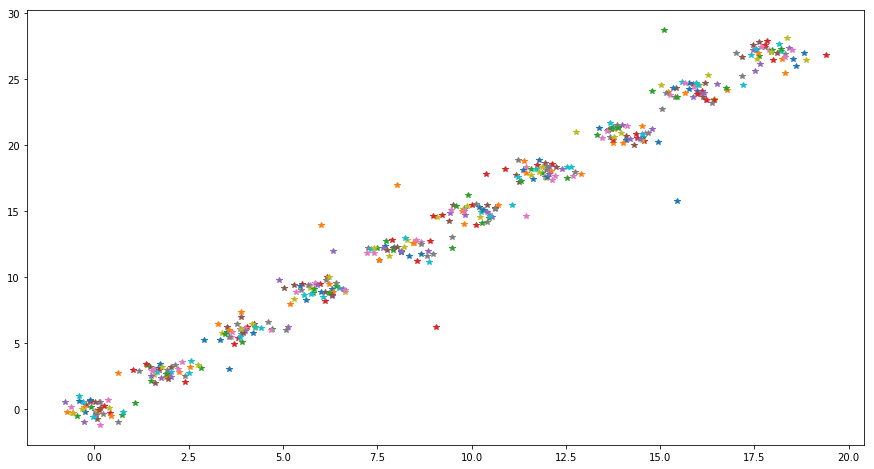

In [5]:
plt.figure(figsize=(15,8))
for i in range(F):
    plt.plot(data[i][:, 0], data[i][:, 1], '*')
# plt.grid()
plt.show()

In [10]:
detector = GaussianMixtureInTimeAnomalyDetector(n_components=10, random_state=1)

In [11]:
scores = detector.fit(data)  # scores  - логарифмическое правдоподобие нормальности для каждого сэмпла

Sample clusters fitting - OK.
100%|██████████| 40/40 [00:00<00:00, 433.70it/s]
Probabilities memorization - OK.
Log-likelihood evaluation - OK.


выявление аномальных сэмплов:

In [12]:
detector.find_anomalies(scores, log_likelihood_threshold=0)

([(-20.304079619859046, (0, 5)),
  (-18.153171225155425, (1, 4)),
  (-16.126379257096165, (3, 2)),
  (-13.940014199807637, (2, 8)),
  (-12.784261841423717, (1, 3)),
  (-1.5792900437813713, (21, 1)),
  (-0.7472205712091043, (9, 9)),
  (-0.38235765269026123, (13, 0)),
  (-0.2648789586385573, (33, 0))],
 0)

In [13]:
detector.find_anomalies(scores, anomaly_top=0.05)

([(-20.304079619859046, (0, 5)),
  (-18.153171225155425, (1, 4)),
  (-16.126379257096165, (3, 2)),
  (-13.940014199807637, (2, 8)),
  (-12.784261841423717, (1, 3)),
  (-1.5792900437813713, (21, 1)),
  (-0.7472205712091043, (9, 9)),
  (-0.38235765269026123, (13, 0)),
  (-0.2648789586385573, (33, 0)),
  (0.19657092517892513, (21, 4)),
  (0.23764623557734496, (20, 2)),
  (0.31059488873696045, (6, 3)),
  (0.3203486102182702, (13, 4)),
  (0.45925005832859683, (24, 2)),
  (0.5490261903761295, (3, 4)),
  (0.5513413543594301, (21, 0)),
  (0.5563788561420479, (39, 8)),
  (0.6440622800901651, (4, 9)),
  (0.6605570536708575, (35, 7)),
  (0.6915754454628665, (5, 0)),
  (0.7435269700164007, (13, 8))],
 0.7435269700164007)

как видно аномалии попали в топ 5%

In [14]:
detector.find_anomalies(scores, anomaly_top=0.1, strategy='series')

([(-10.065986557316005, 1),
  (0.5240750334763238, 0),
  (5.249956459688139, 3),
  (11.91443800224378, 2),
  (16.79858479507833, 21)],
 16.79858479507833)

2 ряда с добавленными аномалиями попали в топ по сумме логорифимических правдоподобий

In [16]:
# for f in range(F):
#     plt.plot(range(T), scores[f],'*')
#     plt.plot([-1, 10], [0,0],'r')
#     plt.xlim([-0.5, 9.5])
#     plt.show()

In [17]:
smoothed_scores = smoothed_sample_anomalies(scores, halflife=2)

/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:321: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [18]:
# for f in range(F):
#     plt.plot(range(T), smoothed_scores[f],'*')
#     plt.plot([-1, 10], [0,0],'r')
#     plt.xlim([-0.5, 9.5])
#     plt.show()

In [19]:
targets = smoothed_sample_anomalies(scores)

/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:321: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [20]:
targets.shape

(40, 10)

In [21]:
# targets2d = targets.reshape((40,10))
# for f in range(F):
#     plt.plot(range(T), smoothed_scores[f],'*')
#     plt.plot([-1, 10], [0,0],'r')
#     plt.xlim([-0.5, 9.5])
#     plt.show()
#     print(targets2d[f])

### MNIST anomalies example

In [6]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print('X размера', X_train.shape, 'y размера', y_train.shape)

X размера (50000, 1, 28, 28) y размера (50000,)


In [7]:
X_train = X_train.reshape(-1, 28, 28)

In [8]:
X_train.shape

(50000, 28, 28)

In [9]:
X_train4 = np.array([x for i, x in enumerate(X_train) if y_train[i] == 4])

выберем небольшой сэмпл

In [10]:
np.random.seed(0)
inds = np.random.choice(np.arange(len(X_train4)), size=1000, replace=False)
X_sample = X_train4[inds]
# y_sample = y_train[inds]

будем считать как время вертикальную ось и искать аномалии вдоль горизонтальных линий изображений. То есть пространство для поиска аномалий бинарные вектора длины 28

Если взять больше слишком много компонент то может не сойтись: произойдет деградация существующих кластеров и sklearn скажет об этом

In [11]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_min=45, n_max=75, step=5, random_state=42,
                                                tol=1e-6)
scores = detector.fit(X_sample)

100%|██████████| 7/7 [00:25<00:00,  3.69s/it]
Best number of clusters (according to BIC) - 50.
Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:36<00:00, 27.65it/s]
Probabilities memorization - OK.


CPU times: user 1min 22s, sys: 8.93 s, total: 1min 31s
Wall time: 1min 37s


Log-likelihood evaluation - OK.


In [104]:
detector.bics

[-6359266.911985902, -6411200.6238484755, inf, inf, inf, inf, inf]

In [105]:
np.mean(scores)

-16.83458931637481

сгладим оценки правдоподобия вдоль линии времени экспоненциальным сглаживанием с окном 7 строк (1/4)  высоты изображения

In [107]:
smoothed_scores = smoothed_sample_anomalies(scores, halflife=7)

/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:321: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=7,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [108]:
np.mean(smoothed_scores)

-16.438285097414266

посмотрим топ 50 аномалий 

In [31]:
top_anomaly = detector.find_anomalies(smoothed_scores, 
                                      strategy='series', anomaly_top=0.05)[0][:20]

In [32]:
num_anomaly = np.array(np.array(top_anomaly)[:, 1], dtype=int)

In [33]:
num_anomaly

array([249,  87, 706, 423, 812, 937, 686, 556, 610, 439,  10, 200, 295,
       485, 735,  43, 984, 117, 843, 953])

In [34]:
%%time
from sklearn.manifold import TSNE

tr = TSNE(n_iter=500)
X_trans = tr.fit_transform(X_sample.reshape(-1, 28 * 28))

CPU times: user 11.6 s, sys: 908 ms, total: 12.5 s
Wall time: 12.6 s


In [35]:
X_trans = np.array(X_trans)

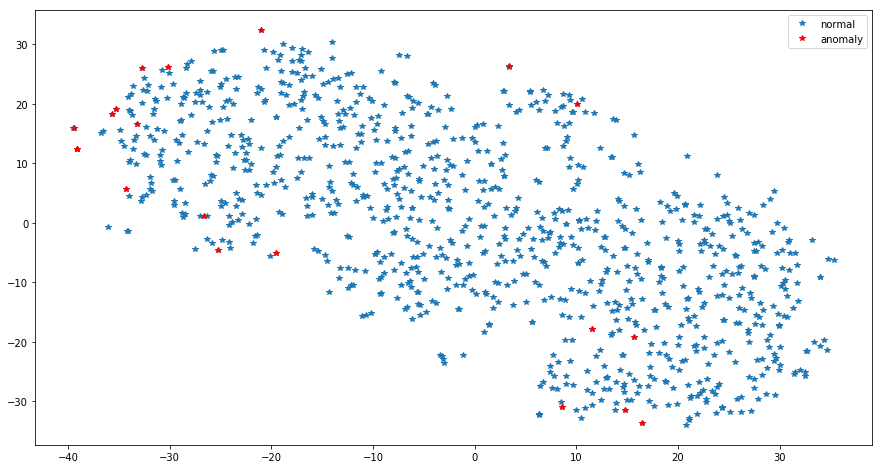

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(X_trans[:, 0], X_trans[:, 1], '*', label='normal')
plt.plot(X_trans[num_anomaly, 0], X_trans[num_anomaly, 1], '*', color='r', label='anomaly')
plt.legend()
plt.show()

распределение правдоподобий:

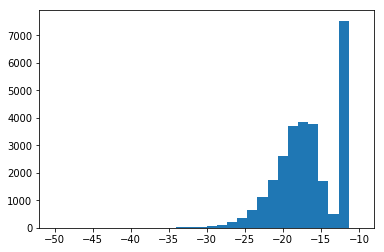

In [37]:
plt.hist(np.nan_to_num(scores.reshape(-1)), bins=30, range=(-50,-10))
plt.show()

In [44]:
np.mean(scores)

-16.829986376672426

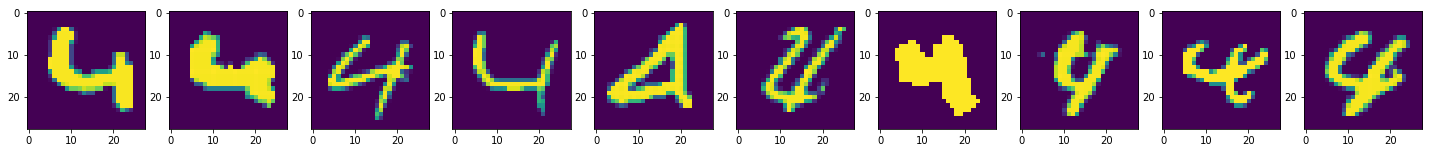

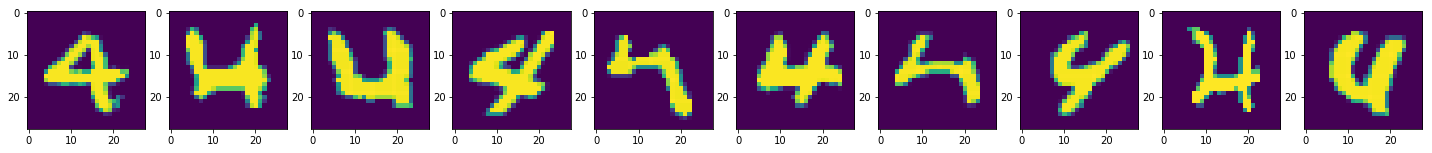

In [38]:
k=10
for i, item in enumerate(top_anomaly):
    if i % k == 0:
        plt.figure(figsize=(25, 10))
    num = item[1]
    score = item[0]
    plt.subplot(1, k, i % k + 1)
    plt.imshow(X_sample[num])
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}'.format(num, y_sample[num]))

In [55]:
all_anomaly = detector.find_anomalies(smoothed_scores, 
                                      strategy='series', anomaly_top=1)[0][-20:]

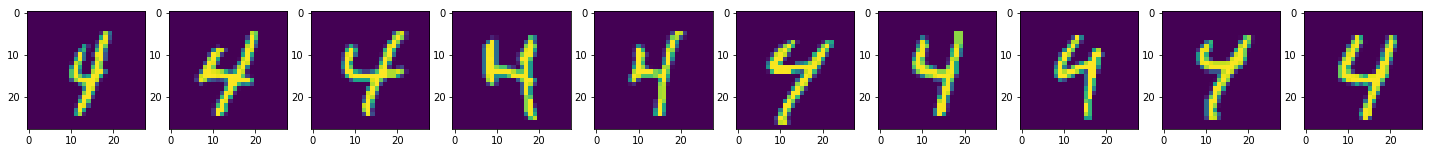

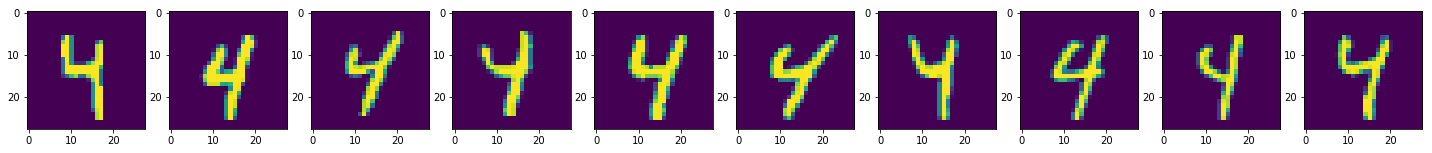

In [56]:
k=10
for i, item in enumerate(all_anomaly):
    if i % k == 0:
        plt.figure(figsize=(25, 10))
    num = item[1]
    score = item[0]
    plt.subplot(1, k, i % k + 1)
    plt.imshow(X_sample[num])
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}'.format(num, y_sample[num]))

можно взглянуть именно на те линии которые считаются наиболее аномальными

In [73]:
from skimage.color import gray2rgb
from collections import defaultdict

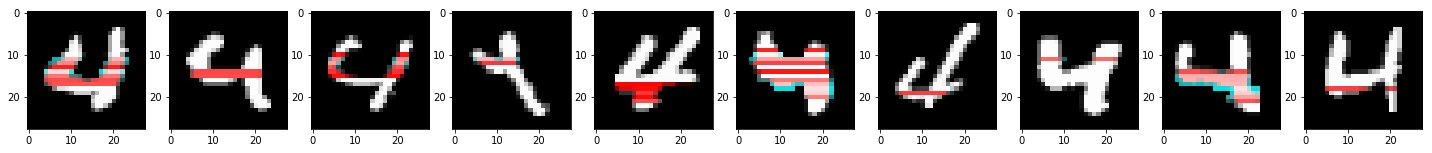

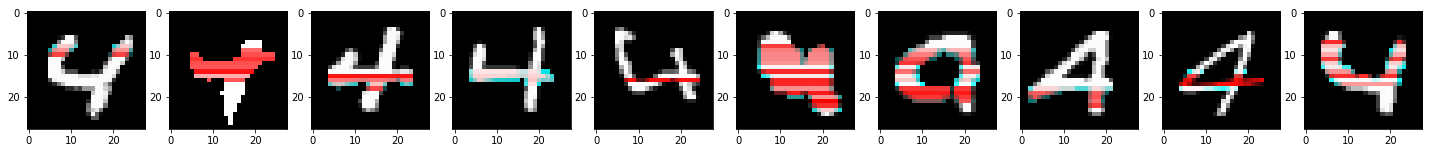

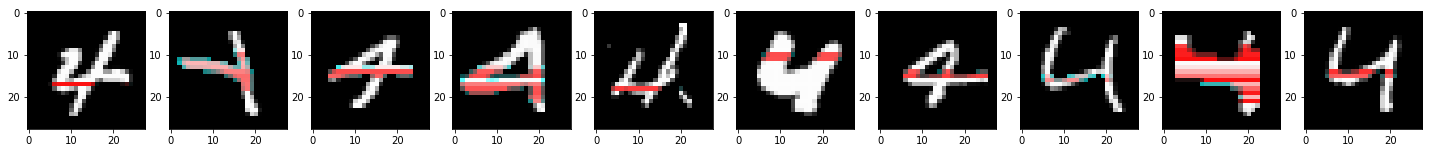

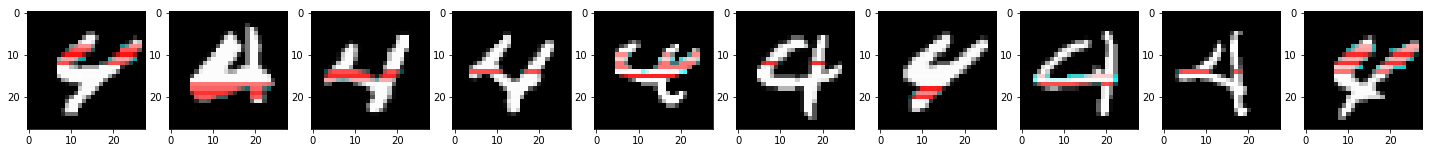

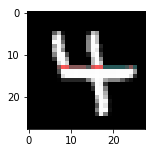

In [74]:
k=10
imgs = set()
lines = defaultdict(list)
for item in detector.find_anomalies(smoothed_scores, 
                                      strategy='sample', anomaly_top=0.05)[0]:
    
    num = item[1][0]
    line = item[1][1]
    score = item[0]
    lines[num].append((line, score))
    imgs.add(num)
    if len(imgs) > 40:
        break
        
for i, num in enumerate(imgs):
    img = gray2rgb(X_sample[num])
    if i % k == 0:
        plt.figure(figsize=(25, 10))
#     plt.subplot(1,2,1)
#     plt.imshow(img)
    for line,score in lines[num]:
        img[line-2][:, 1:3] = min(255, max(0, np.log(-score) * 20)) * (img[line-2][:, 1:3] > 0)
#         img[line-2][:, 0] /
#     plt.subplot(1,2,2)
#     plt.imshow(img)
#     plt.show()
    
    plt.subplot(1, k, i % k + 1)
    plt.imshow(img)
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}, bad_line: {}'.format(num, y_sample[num], line))

In [45]:
np.mean(scores)

-16.829986376672426

In [46]:
smoothed_scores.shape

(1000, 28)

In [48]:
np.mean(smoothed_scores)

-16.439657931066506

In [64]:
X_sample.shape

(1000, 28, 28)

In [161]:
X_sample_win = make_window(X_sample, 3)

In [178]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_min=1, n_max=25, step=2, random_state=42,
                                                tol=1e-6)
scores_big = detector.fit(X_sample_win)

100%|██████████| 13/13 [00:40<00:00,  3.13s/it]
Best number of clusters (according to BIC) - 17.
Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:09<00:00, 100.77it/s]
Probabilities memorization - OK.
/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:243: RuntimeWarning: divide by zero encountered in log
  for cluster in np.arange(self.n_components)]))


CPU times: user 1min 20s, sys: 14.7 s, total: 1min 34s
Wall time: 58.9 s


Log-likelihood evaluation - OK.


In [179]:
detector.bics

[4187481.8115730816,
 -7554900.999874821,
 -11108446.195763046,
 -13028461.836229721,
 -13831085.0842874,
 -14742775.773015372,
 -15174592.541889882,
 -15332150.119226502,
 -15619314.040292175,
 -14355283.834976569,
 inf,
 inf,
 inf]

In [60]:
type(scores_big)

numpy.ndarray

In [186]:
np.mean(np.clip(scores_big, -100, 100))

-79.59619059840091

In [66]:
scores_big

array([[-37.64835145, -37.64835145, -37.65030176, ..., -38.99142678,
        -37.88102106, -37.65737035],
       [-37.64835145, -37.64835145, -37.65030176, ..., -45.78876919,
        -44.30557822, -37.65737035],
       [-37.64835145, -37.64835145, -37.65030176, ..., -38.99142678,
        -37.88102106, -37.65737035],
       ...,
       [-37.64835145, -37.64835145, -37.65030176, ..., -38.99142678,
        -37.88102106, -37.65737035],
       [-37.64835145, -37.64835145, -37.65030176, ..., -38.99142678,
        -37.88102106, -37.65737035],
       [-37.64835145, -37.64835145, -37.65030176, ..., -38.99142678,
        -37.88102106, -37.65737035]])

In [127]:
# pd.read_csv('../flightData/aligned/122.csv')

In [12]:
cagi = []

path = '../flightData/aligned/'

from tqdm import tqdm 

for i in tqdm(range(368)):
    cagi.append(pd.read_csv(path + str(i) + '.csv')[1000:1999])

100%|██████████| 368/368 [00:10<00:00, 36.20it/s]


In [13]:
cagi_data = np.array([c.values for c in cagi])

In [14]:
cagi_data = np.nan_to_num(cagi_data)

In [ ]:
cagi_data

In [34]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_components=110, random_state=42,
                                                tol=1e-3)
scores_cagi = detector.fit(cagi_data)

Sample clusters fitting - OK.
100%|██████████| 368/368 [12:25<00:00,  2.03s/it]
Probabilities memorization - OK.
/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:243: RuntimeWarning: divide by zero encountered in log
  for cluster in np.arange(self.n_components)]))


CPU times: user 26min 27s, sys: 1min 37s, total: 28min 5s
Wall time: 28min 18s


Log-likelihood evaluation - OK.


In [77]:
detector.bics

[-65280909.970134,
 -66420453.15591134,
 -71381777.35772036,
 -72325882.72304617,
 -73363133.02948782,
 -74731912.18702963,
 -75592604.6742579]

In [111]:
np.mean(np.nan_to_num(scores_cagi))

NameError: name 'scores_cagi' is not defined

In [141]:
smoothed_scores_cagi = smoothed_sample_anomalies(np.nan_to_num(scores_cagi), halflife=5)

/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:321: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=5,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [147]:
np.mean(smoothed_scores_cagi)

-38.59344344036492

In [151]:
cagi_sample_big = make_window(cagi_data)

In [152]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_components=100, random_state=42,
                                                tol=1e-2)
scores_cagi_win = detector.fit(cagi_sample_big)

Sample clusters fitting - OK.
  2%|▏         | 7/368 [00:17<14:45,  2.45s/it]/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:191: RuntimeWarning: invalid value encountered in double_scalars
  self.__p_cluster_sample[cluster][time][series] = probs[cluster] / norma
100%|██████████| 368/368 [13:21<00:00,  2.18s/it]
Probabilities memorization - OK.


CPU times: user 30min 7s, sys: 1min 33s, total: 31min 41s
Wall time: 30min 38s


Log-likelihood evaluation - OK.


In [153]:
np.mean(np.nan_to_num(scores_cagi_win))

-229.242938191208

In [100]:
def apply_to_frame(X, f):
    assert len(X.shape) == 3
    sh = X.shape
    X = X.reshape(-1,X.shape[2])
    Y = f(X)
    return Y.reshape(sh[0], sh[1], -1)

In [11]:
import cat_counter
reload(cat_counter)

<module 'cat_counter' from '/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/cat_counter.py'>

In [12]:
from cat_counter import CatCounter

In [101]:
def detector_with_ctr(X, ctr_cols, kwargs1, kwargs2):
    detector = GaussianMixtureInTimeAnomalyDetector(**kwargs1)
#     X_not_ctr = X[:, :, np.array(list(set(np.arange(X.shape[2])) - set(ctr_cols)))]
    scores = detector.fit(X)
    X_processed = apply_to_frame(X[:,:,ctr_cols], lambda x: CatCounter('regression').fit(x, scores.reshape(-1)))
    detector_new = GaussianMixtureInTimeAnomalyDetector(**kwargs2)
    print(X.shape, X_processed.shape)
    return detector_new.fit(np.clip(np.concatenate([X, X_processed], axis=2), -100, 100))

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [253]:
OneHotEncoder().fit_transform(np.arange(12).reshape(3, 4)).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [105]:
def detector_with_one_hot(X, one_hot_cols, kwargs):
    if len(one_hot_cols) != X.shape[2]:
        X_other = X[:, :, np.array(list(set(np.arange(X.shape[2])) - set(one_hot_cols)))]
    X_one_hot = apply_to_frame(X[:, :, one_hot_cols], lambda x:OneHotEncoder().fit_transform(x).toarray())
    detector = GaussianMixtureInTimeAnomalyDetector(**kwargs)
#     print(X_other.shape, X_one_hot.shape)
    if len(one_hot_cols) != X.shape[2]:
        return detector.fit(np.nan_to_num(np.concatenate([X_other, X_one_hot], axis=2)))
    else:
        return detector.fit(X_one_hot)

In [255]:
X_sample.shape

(1000, 28, 28)

In [106]:
scores_one_hot = detector_with_one_hot(X_sample, np.arange(28), {'n_components':60, 'random_state':42, 'tol':1e-6, })

Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:32<00:00, 30.40it/s]
Probabilities memorization - OK.
Log-likelihood evaluation - OK.


In [107]:
np.mean(scores_one_hot)

-11.914768371766566

In [108]:
%%time
scores_ctr = detector_with_ctr(X_sample, np.arange(0, 28, 2), {'n_components':30, 'random_state':42, 'tol':1e-6},
                               {'n_components':60, 'random_state':42, 'tol':1e-6})

Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:17<00:00, 55.63it/s]
Probabilities memorization - OK.
Log-likelihood evaluation - OK.


(1000, 28, 28) (1000, 28, 14)


Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:34<00:00, 28.96it/s]
Probabilities memorization - OK.


CPU times: user 1min 47s, sys: 9.6 s, total: 1min 57s
Wall time: 1min 53s


Log-likelihood evaluation - OK.


In [109]:
np.mean(scores_ctr)

-34.22089386930974

In [16]:
def get_cat_cols(X, max_classes):
    assert len(X.shape) == 3
    cat_cols = []
    numb = []
    for col in np.arange(X.shape[2]):
        un = np.unique(X[:, :, col])
        if len(un) <= max_classes and np.min(un) >= 0:
            cat_cols.append(col)
            numb.append(len(un))
    return cat_cols, numb

In [17]:
cagi_cat_cols, numb = get_cat_cols(cagi_data, 50)

In [18]:
list(zip(cagi_cat_cols, numb))

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 5),
 (4, 2),
 (5, 3),
 (7, 2),
 (8, 2),
 (15, 6),
 (16, 2),
 (17, 2),
 (26, 1),
 (30, 3),
 (36, 28),
 (37, 29)]

In [110]:
%%time
scores_cagi_one_hot = detector_with_one_hot(cagi_data, cagi_cat_cols,
                               {'n_components':60, 'random_state':42, 'tol':1e-6})

Sample clusters fitting - OK.
100%|██████████| 368/368 [07:22<00:00,  1.20s/it]
Probabilities memorization - OK.
/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:243: RuntimeWarning: divide by zero encountered in log
  for cluster in np.arange(self.n_components)]))


CPU times: user 15min 34s, sys: 56.7 s, total: 16min 30s
Wall time: 16min 14s


Log-likelihood evaluation - OK.


In [20]:
%%time
scores_cagi_ctr = detector_with_ctr(cagi_data[:100], cagi_cat_cols, {'n_components':20, 'random_state':42, 'tol':1e-3,},
                               {'n_components':20, 'random_state':42, 'tol':1e-6})

Sample clusters fitting - OK.
100%|██████████| 100/100 [00:39<00:00,  2.55it/s]
Probabilities memorization - OK.
/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:243: RuntimeWarning: divide by zero encountered in log
  for cluster in np.arange(self.n_components)]))
Log-likelihood evaluation - OK.
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/sergmiller/Documents/my/code/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:202: RuntimeWarning: invalid value encountered in subtract
  return (X - self.data_mean) / self.data_std


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
np.mean(scores_cagi_ctr), np.mean(np.nan_to_num(scores_cagi_ctr))

NameError: name 'scores_cagi_ctr' is not defined

In [238]:
np.mean(scores_ctr)

-17.42865721997578

In [5]:
def make_window(X, window_size=5):
    X_sample_big = []
    for x in X:
        cur = []
        for i in range(len(x)):
            cur.append(np.array([x[j] for j in range(i - window_size + 1, i + 1)]).reshape(-1))
        X_sample_big.append(cur)

    return np.array(X_sample_big)

In [261]:
from scipy.stats import ttest_ind 

In [23]:
np.mean(scores)

NameError: name 'scores' is not defined

In [286]:
np.mean(np.nan_to_num(scores_cagi)), np.mean(np.nan_to_num(scores_cagi_ctr))

(-38.597848176917196, -40.87284926533848)

In [292]:
ttest_ind(np.nan_to_num(scores_cagi).reshape(-1), np.nan_to_num(scores_cagi_ctr).reshape(-1))

Ttest_indResult(statistic=113.27333745474685, pvalue=0.0)

In [29]:
from sklearn.neighbors import DistanceMetric

def make_mahalanobis_target(X):
    assert len(X.shape) == 3
    Y = np.zeros(X.shape[:2])
    for t in np.arange(X.shape[1]):
        x = X[:, t]
        M = np.mean(x, axis=0)
        dist = DistanceMetric.get_metric('mahalanobis', V=np.cov((x + np.random.normal(size=x.shape) * 1e-6).T))
        Y[:, t] = dist.pairwise(x, np.array([M])).reshape(-1) > 6
    
    return Y

In [30]:
y_mnist = make_mahalanobis_target(X_sample)
y_cagi = make_mahalanobis_target(cagi_data)

In [31]:
np.sum(y_cagi) / (np.prod(y_cagi.shape))

0.301488988988989

In [32]:
from sklearn.metrics import precision_recall_curve, auc

def calc_auc_prc(y_true, y_pred):
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)
    curve = precision_recall_curve(y_true, y_pred)
    score = auc(curve[1], curve[0])
    plt.plot(curve[1], curve[0])
    plt.show()
        
    return score

In [117]:
np.mean(scores_ctr)

-34.22089386930974

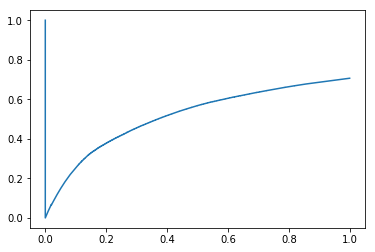

0.5145383302930182

In [188]:
calc_auc_prc(y_mnist, np.clip(scores_big, -100, 100))

In [92]:
y_mnist.shape, scores_ctr.shape

((1000, 28), (1000, 28))

In [33]:
calc_auc_prc(y_cagi, np.nan_to_num(scores_cagi))

NameError: name 'scores_cagi' is not defined